<a href="https://colab.research.google.com/github/jinwoongokRe/AI_basic_study/blob/master/practive5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.datasets import mnist


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train.shape #(28,28)짜리 data가 60000개 있다.

(60000, 28, 28)

In [8]:
X_train[0] # 1번째 이미지

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

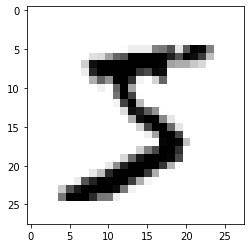

In [9]:
#그려보기 연습
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [11]:
y_train.shape

(60000,)

In [12]:
y_train[0]

5

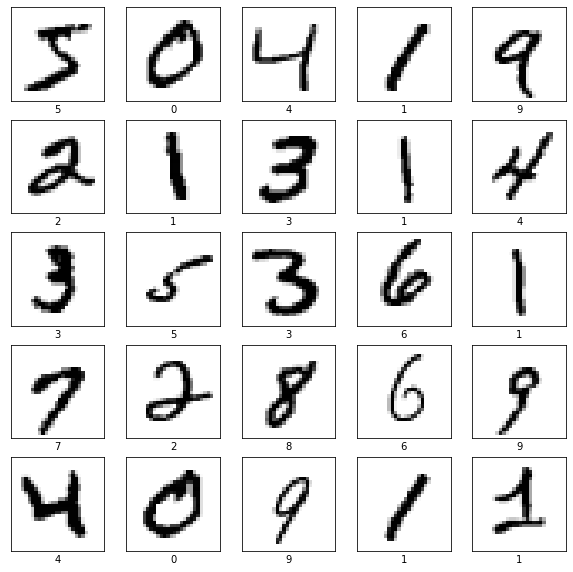

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(str(y_train[i]))
plt.show()

In [25]:
#본론 : 이들을 50000개는 train set에, 10000개는 test set에 넣고 싶다.
X_train.shape

(60000, 28, 28)

**1. Holdout 기법 - slicing**

0) warm up

In [26]:
import numpy as np

In [28]:
a= np.arange(30).reshape(6,5) #0부터 29까지 30개 배열 만든 후에 6행 5열 로

In [30]:
a 

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

6개의 행을 5개와 1개로 slicing 하려면~

In [31]:
a_train = a[:5]

In [32]:
a_train

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [33]:
a_test = a[5:]

In [34]:
a_test

array([[25, 26, 27, 28, 29]])

*실습*

In [35]:
X_train_train = X_train[:50000]

In [36]:
X_train_train.shape

(50000, 28, 28)

In [37]:
X_train_val = X_train[50000:]

In [38]:
X_train_val

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [39]:
X_train_val.shape

(10000, 28, 28)

**2. scikit-learn의 train_test_split**

0) 기본개념
사이킷런: ML framework¶
딥러닝의 tensorflow라고 생각하면 된다.

1) 간단한 설명
여러 split 기법들이 있지만 지원되는 기능이 많아 가장 많이 사용된다.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [43]:
x, y = train_test_split(a, train_size = 0.667, random_state = 3)

In [44]:
x

array([[20, 21, 22, 23, 24],
       [ 5,  6,  7,  8,  9],
       [ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14]])

In [45]:
y

array([[15, 16, 17, 18, 19],
       [25, 26, 27, 28, 29]])

In [46]:
b = np.arange(100, 124).reshape(6,4)

In [47]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [48]:
b

array([[100, 101, 102, 103],
       [104, 105, 106, 107],
       [108, 109, 110, 111],
       [112, 113, 114, 115],
       [116, 117, 118, 119],
       [120, 121, 122, 123]])

In [49]:
x1, y1, x2, y2 = train_test_split(a,b, test_size= 0.666, random_state= 3)

In [50]:
x2

array([[100, 101, 102, 103],
       [108, 109, 110, 111]])

2)실습

In [51]:
X_train.shape

(60000, 28, 28)

In [53]:
y_train.shape

(60000,)

In [54]:
X_train_, X_val, y_train_, y_test = train_test_split(X_train, y_train, test_size=0.16666)

In [55]:
X_train_.shape

(50000, 28, 28)

In [56]:
y_train_.shape

(50000,)

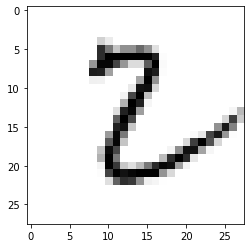

In [57]:
plt.imshow(X_train_[0], cmap=plt.cm.binary)

In [58]:
y_train_[0]

2